### KOLF genome methylation comparison: ont vs. pb

Read in data:

In [1]:
#!pip3 install pandas aplanat
# !pip3 install seaborn
import pandas as pd
import numpy as np
import aplanat
from aplanat import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
from matplotlib import gridspec

/Users/gennerrm/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/gennerrm/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
cpg_bed = pd.read_csv(
    "cpg_hg38.bed",
    sep="\t", header=None, engine="c")

cpg_bed

,0,1,2,3,4,5,6,7,8,9
0,#chrom,chromStart,chromEnd,name,length,cpgNum,gcNum,perCpg,perGc,obsExp
1,chr1,28735,29737,CpG:_111,1002,111,731,22.2,73,0.85
2,chr1,135124,135563,CpG:_30,439,30,295,13.7,67.2,0.64
3,chr1,199251,200121,CpG:_104,870,104,643,23.9,73.9,0.89
4,chr1,368792,370063,CpG:_99,1271,99,777,15.6,61.1,0.84
...,...,...,...,...,...,...,...,...,...,...
27945,chrY,25464370,25464941,CpG:_51,571,51,403,17.9,70.6,0.72
27946,chrY,26409388,26409785,CpG:_32,397,32,252,16.1,63.5,0.82
27947,chrY,26627168,26627397,CpG:_25,229,25,172,21.8,75.1,0.78
27948,chrY,57067645,57068034,CpG:_36,389,36,257,18.5,66.1,0.85


In [3]:
KOLF_ont_Hs = pd.read_csv(
    "KOLF_ont_Hs.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'score':int, 'strand':str, 'tstart':int, 'tend':int, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'score', 'strand', 'tstart', 'tend', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

print("KOLF ont Hs data")
KOLF_ont_Hs

KOLF ont Hs data


,chrom,start,end,name,score,strand,tstart,tend,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,959245,959305,NOC2L_1,900,-,959245,959256,6.655329,8.625277,28.0,7.916667,10.603873,12.0,5.231481,6.359467,12.0
1,chr1,960583,960643,KLHL17_1,900,+,960632,960643,8.825691,11.626220,27.0,8.796296,12.884185,12.0,6.805556,8.967749,10.0
2,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492,15.119048,20.009564,20.0,20.292208,22.706391,11.0,8.796296,13.671132,9.0
3,chr1,976670,976730,PERM1_1,900,-,976670,976681,13.458995,21.027496,18.0,12.314815,17.487993,9.0,8.571429,14.568627,7.0
4,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097,5.445758,8.257538,39.0,7.493924,8.618725,19.0,3.500000,7.390873,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,chrX,155612941,155613001,TMLHE_1,900,-,155612941,155612952,22.813853,24.039113,11.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
29594,chrX,155767702,155767762,SPRY3_2,900,+,155767751,155767762,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
29595,chrX,155881295,155881355,VAMP7_1,900,+,155881344,155881355,56.585775,45.691987,26.0,98.076923,4.510015,13.0,8.373016,11.672941,10.0
29596,chrY,18992808,18992868,CD24_1,900,-,18992808,18992819,9.524658,9.449059,17.0,20.000000,0.000000,1.0,-1.000000,-1.000000,-1.0


In [4]:
KOLF_pb_Hs = pd.read_csv(
    "KOLF_pb_Hs.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'score':int, 'strand':str, 'tstart':int, 'tend':int, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'score', 'strand', 'tstart', 'tend', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

print("KOLF pb Hs data")
KOLF_pb_Hs

KOLF pb Hs data


,chrom,start,end,name,score,strand,tstart,tend,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,959245,959305,NOC2L_1,900,-,959245,959256,5.431548,9.288352,56.0,5.514706,9.542487,34.0,5.303030,8.879773,22.0
1,chr1,960583,960643,KLHL17_1,900,+,960632,960643,16.648295,14.492946,54.0,17.273243,14.263331,35.0,15.497076,14.837921,19.0
2,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492,13.297872,15.979595,47.0,15.530303,17.416006,33.0,8.035714,10.140908,14.0
3,chr1,976670,976730,PERM1_1,900,-,976670,976681,24.036281,22.029919,42.0,15.942029,15.130879,23.0,33.834586,24.906783,19.0
4,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097,4.401993,9.714946,43.0,4.017857,7.430052,16.0,4.629630,10.837685,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,chrX,155612941,155613001,TMLHE_1,900,-,155612941,155612952,6.666667,10.636320,33.0,6.666667,9.428090,12.0,7.500000,9.682458,8.0
29594,chrX,155767702,155767762,SPRY3_2,900,+,155767751,155767762,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
29595,chrX,155881295,155881355,VAMP7_1,900,+,155881344,155881355,55.203202,41.688295,58.0,82.500000,25.495098,25.0,10.389610,9.003522,11.0
29596,chrY,18992808,18992868,CD24_1,900,-,18992808,18992819,15.696970,13.018176,30.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0


In [5]:
#KOLF_pb_Hs_mod = KOLF_pb_Hs.drop(KOLF_pb_Hs.columns[[4,5,6,7]],axis=1)
#KOLF_pb_Hs_mod

In [6]:
KOLF_ont_cpg = pd.read_csv(
    "KOLF_ont_cpg.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'idk1':float, 'idk2':float, 'idk3':float, 'idk4':float, 'idk5':float, 'idk6':float, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'idk1', 'idk2', 'idk3', 'idk4', 'idk5', 'idk6', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

print("KOLF ont CpG data")
KOLF_ont_cpg

KOLF ont CpG data


,chrom,start,end,name,idk1,idk2,idk3,idk4,idk5,idk6,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,28735,29737,CpG:_111,1002.0,111.0,731.0,22.2,73.0,0.85,14.125110,12.538598,77.0,13.937391,9.766899,51.0,14.493329,16.681789,26.0
1,chr1,135124,135563,CpG:_30,439.0,30.0,295.0,13.7,67.2,0.64,92.249360,6.570105,23.0,94.123010,4.799198,12.0,90.205378,7.557979,11.0
2,chr1,199251,200121,CpG:_104,870.0,104.0,643.0,23.9,73.9,0.89,9.837930,4.311553,18.0,10.115214,5.329828,7.0,9.661476,3.501698,11.0
3,chr1,368792,370063,CpG:_99,1271.0,99.0,777.0,15.6,61.1,0.84,94.033198,2.606688,18.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
4,chr1,381172,382185,CpG:_84,1013.0,84.0,734.0,16.6,72.5,0.64,93.545341,3.346222,25.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27944,chrY,25464370,25464941,CpG:_51,571.0,51.0,403.0,17.9,70.6,0.72,92.236698,6.112161,8.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
27945,chrY,26409388,26409785,CpG:_32,397.0,32.0,252.0,16.1,63.5,0.82,91.665397,6.033898,21.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
27946,chrY,26627168,26627397,CpG:_25,229.0,25.0,172.0,21.8,75.1,0.78,89.678151,10.924243,21.0,82.261905,14.346596,4.0,72.727273,0.000000,1.0
27947,chrY,57067645,57068034,CpG:_36,389.0,36.0,257.0,18.5,66.1,0.85,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0


In [7]:
KOLF_ont_cpg_mod = KOLF_ont_cpg.drop(KOLF_ont_cpg.columns[[4,5,6,7,8,9]],axis=1)
KOLF_ont_cpg_mod

,chrom,start,end,name,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,28735,29737,CpG:_111,14.125110,12.538598,77.0,13.937391,9.766899,51.0,14.493329,16.681789,26.0
1,chr1,135124,135563,CpG:_30,92.249360,6.570105,23.0,94.123010,4.799198,12.0,90.205378,7.557979,11.0
2,chr1,199251,200121,CpG:_104,9.837930,4.311553,18.0,10.115214,5.329828,7.0,9.661476,3.501698,11.0
3,chr1,368792,370063,CpG:_99,94.033198,2.606688,18.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
4,chr1,381172,382185,CpG:_84,93.545341,3.346222,25.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27944,chrY,25464370,25464941,CpG:_51,92.236698,6.112161,8.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
27945,chrY,26409388,26409785,CpG:_32,91.665397,6.033898,21.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
27946,chrY,26627168,26627397,CpG:_25,89.678151,10.924243,21.0,82.261905,14.346596,4.0,72.727273,0.000000,1.0
27947,chrY,57067645,57068034,CpG:_36,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0


In [8]:
KOLF_pb_cpg = pd.read_csv(
    "KOLF_pb_cpg.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'idk1':float, 'idk2':float, 'idk3':float, 'idk4':float, 'idk5':float, 'idk6':float, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'idk1', 'idk2', 'idk3', 'idk4', 'idk5', 'idk6', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

print("KOLF pb CpG data")
KOLF_pb_cpg
KOLF_pb_cpg_mod = KOLF_pb_cpg.drop(KOLF_pb_cpg.columns[[4,5,6,7,8,9]],axis=1)
KOLF_pb_cpg_mod

KOLF pb CpG data


,chrom,start,end,name,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,28735,29737,CpG:_111,23.109458,24.631769,54.0,13.915409,7.402234,20.0,28.517722,29.196167,34.0
1,chr1,135124,135563,CpG:_30,84.806497,10.663242,51.0,86.011069,11.352115,27.0,83.451355,9.652691,24.0
2,chr1,199251,200121,CpG:_104,13.201518,6.228810,53.0,13.540139,6.599447,32.0,12.685524,5.577809,21.0
3,chr1,368792,370063,CpG:_99,79.264671,6.800903,2.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
4,chr1,381172,382185,CpG:_84,90.114336,7.650753,19.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27944,chrY,25464370,25464941,CpG:_51,88.913929,4.537767,22.0,94.117647,0.000000,1.0,-1.000000,-1.000000,-1.0
27945,chrY,26409388,26409785,CpG:_32,86.510417,7.442451,20.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
27946,chrY,26627168,26627397,CpG:_25,89.212121,8.668150,33.0,-1.000000,-1.000000,-1.0,88.400000,11.235658,10.0
27947,chrY,57067645,57068034,CpG:_36,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0


In [9]:
select = {"chr1", "chr2", "chr3", "chr4",'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX'}
KOLF_ont_cpg_modp = KOLF_ont_cpg_mod.loc[(KOLF_ont_cpg_mod['chrom'].isin(select))]
KOLF_pb_cpg_modp = KOLF_pb_cpg_mod.loc[(KOLF_pb_cpg_mod['chrom'].isin(select))]
combined_cpg = pd.merge(KOLF_ont_cpg_modp, KOLF_pb_cpg_modp, how='outer', on=['chrom', 'start', 'end'], suffixes=['.ont', '.pb'])
combined_cpg

,chrom,start,end,name.ont,avg_mod.ont,SD_avg_mod.ont,coverage.ont,avg_mod_h1.ont,SD_avg_mod_h1.ont,coverage_h1.ont,...,name.pb,avg_mod.pb,SD_avg_mod.pb,coverage.pb,avg_mod_h1.pb,SD_avg_mod_h1.pb,coverage_h1.pb,avg_mod_h2.pb,SD_avg_mod_h2.pb,coverage_h2.pb
0,chr1,28735,29737,CpG:_111,14.125110,12.538598,77.0,13.937391,9.766899,51.0,...,CpG:_111,23.109458,24.631769,54.0,13.915409,7.402234,20.0,28.517722,29.196167,34.0
1,chr1,135124,135563,CpG:_30,92.249360,6.570105,23.0,94.123010,4.799198,12.0,...,CpG:_30,84.806497,10.663242,51.0,86.011069,11.352115,27.0,83.451355,9.652691,24.0
2,chr1,199251,200121,CpG:_104,9.837930,4.311553,18.0,10.115214,5.329828,7.0,...,CpG:_104,13.201518,6.228810,53.0,13.540139,6.599447,32.0,12.685524,5.577809,21.0
3,chr1,368792,370063,CpG:_99,94.033198,2.606688,18.0,-1.000000,-1.000000,-1.0,...,CpG:_99,79.264671,6.800903,2.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
4,chr1,381172,382185,CpG:_84,93.545341,3.346222,25.0,-1.000000,-1.000000,-1.0,...,CpG:_84,90.114336,7.650753,19.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27750,chrX,155457726,155458858,CpG:_142,9.464935,5.265257,16.0,-1.000000,-1.000000,-1.0,...,CpG:_142,14.731274,6.529568,41.0,13.297477,3.726411,10.0,15.193789,7.143676,31.0
27751,chrX,155459685,155460127,CpG:_41,90.589405,5.479587,17.0,-1.000000,-1.000000,-1.0,...,CpG:_41,89.880399,6.867126,42.0,88.731707,9.209732,10.0,90.239366,5.903129,32.0
27752,chrX,155612451,155613058,CpG:_44,13.421550,7.790057,22.0,-1.000000,-1.000000,-1.0,...,CpG:_44,14.709963,8.944491,32.0,15.151515,9.247391,12.0,15.056818,9.638179,8.0
27753,chrX,155881125,155881514,CpG:_36,53.710440,42.138406,26.0,91.707991,5.099501,13.0,...,CpG:_36,59.229289,37.964972,58.0,84.964332,19.805661,25.0,15.194805,9.016513,11.0


In [10]:
inner_combined_cpg = pd.merge(KOLF_ont_cpg_mod, KOLF_pb_cpg_mod, how="inner", on=["chrom", "start", "end"], suffixes=['.ont', '.pb'])
# inner_combined.loc[(inner_combined['chrom'].isin({'chr20'}))].head()
inner_combined_cpg.head()

,chrom,start,end,name.ont,avg_mod.ont,SD_avg_mod.ont,coverage.ont,avg_mod_h1.ont,SD_avg_mod_h1.ont,coverage_h1.ont,...,name.pb,avg_mod.pb,SD_avg_mod.pb,coverage.pb,avg_mod_h1.pb,SD_avg_mod_h1.pb,coverage_h1.pb,avg_mod_h2.pb,SD_avg_mod_h2.pb,coverage_h2.pb
0,chr1,28735,29737,CpG:_111,14.125110,12.538598,77.0,13.937391,9.766899,51.0,...,CpG:_111,23.109458,24.631769,54.0,13.915409,7.402234,20.0,28.517722,29.196167,34.0
1,chr1,135124,135563,CpG:_30,92.249360,6.570105,23.0,94.123010,4.799198,12.0,...,CpG:_30,84.806497,10.663242,51.0,86.011069,11.352115,27.0,83.451355,9.652691,24.0
2,chr1,199251,200121,CpG:_104,9.837930,4.311553,18.0,10.115214,5.329828,7.0,...,CpG:_104,13.201518,6.228810,53.0,13.540139,6.599447,32.0,12.685524,5.577809,21.0
3,chr1,368792,370063,CpG:_99,94.033198,2.606688,18.0,-1.000000,-1.000000,-1.0,...,CpG:_99,79.264671,6.800903,2.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0
4,chr1,381172,382185,CpG:_84,93.545341,3.346222,25.0,-1.000000,-1.000000,-1.0,...,CpG:_84,90.114336,7.650753,19.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0


<AxesSubplot:xlabel='avg_mod.ont', ylabel='Density'>

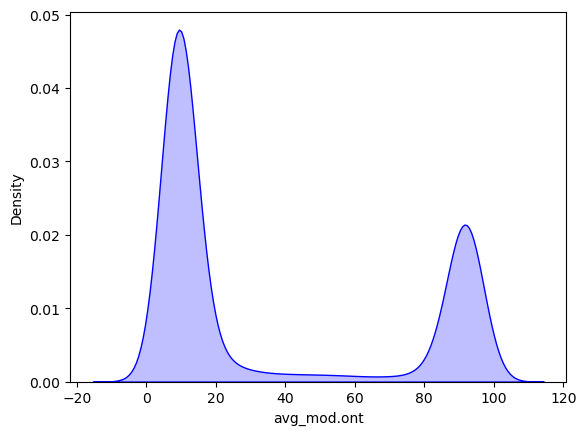

In [11]:
# density of ONT methylation frequencies
fig, ax = plt.subplots()
sns.kdeplot(combined_cpg['avg_mod.ont'], color='blue', fill=True)
# plt.savefig('density.plot.svg')

<AxesSubplot:xlabel='avg_mod.pb', ylabel='Density'>

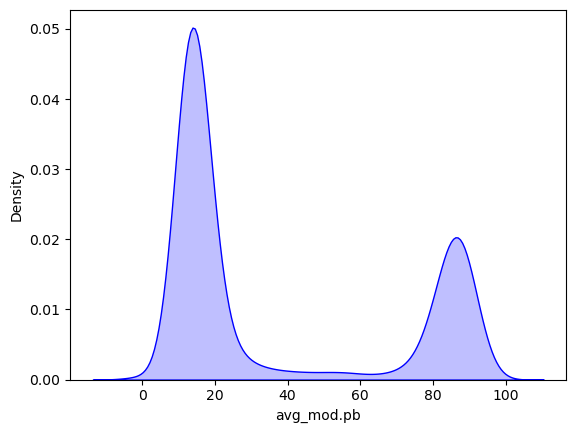

In [12]:
sns.kdeplot(combined_cpg['avg_mod.pb'], color='blue', fill=True)

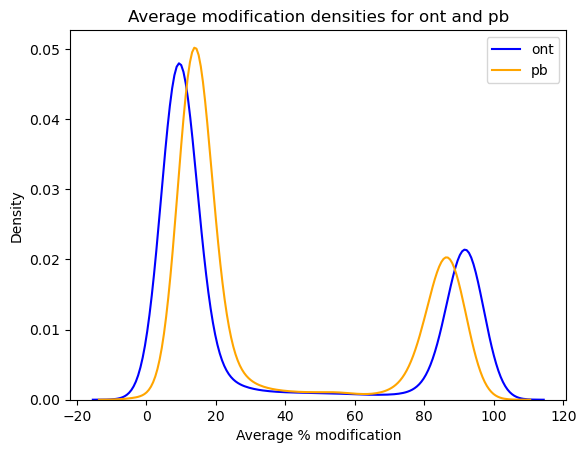

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(combined_cpg['avg_mod.ont'], ax=ax, color='blue', label='ont').set_title('Average modification densities for ont and pb')
sns.kdeplot(combined_cpg['avg_mod.pb'], ax=ax, color='orange', label='pb')
ax.set(xlabel = 'Average % modification')
ax.legend()
plt.show()

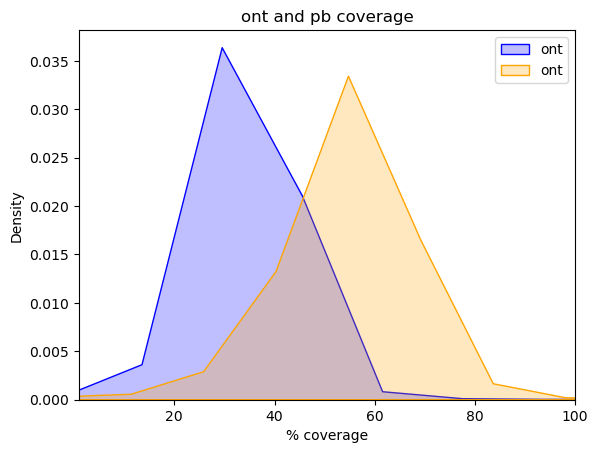

In [14]:
fig, ax = plt.subplots()
sns.kdeplot(combined_cpg['coverage.ont'], ax=ax, color='blue', label='ont', fill=True).set_title('ont and pb coverage')
sns.kdeplot(combined_cpg['coverage.pb'], ax=ax, color='orange', label='ont', fill=True)
ax.set_xlim(1, 100)
ax.set(xlabel='% coverage')
ax.legend()
plt.show()

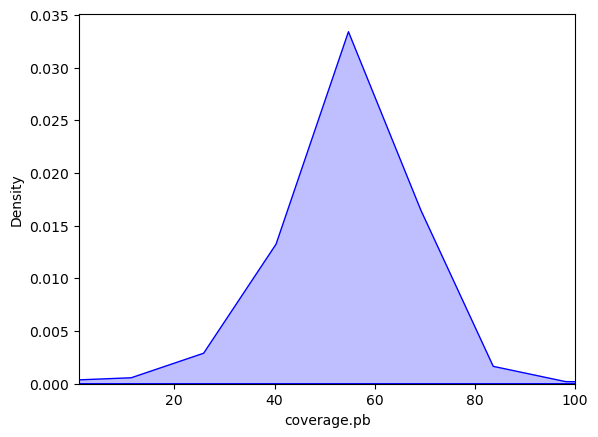

In [15]:
fig, ax = plt.subplots()
sns.kdeplot(combined_cpg['coverage.pb'], ax=ax, color='blue', fill=True)
ax.set_xlim(1, 100)
plt.show()

<AxesSubplot:xlabel='avg_mod.pb', ylabel='Density'>

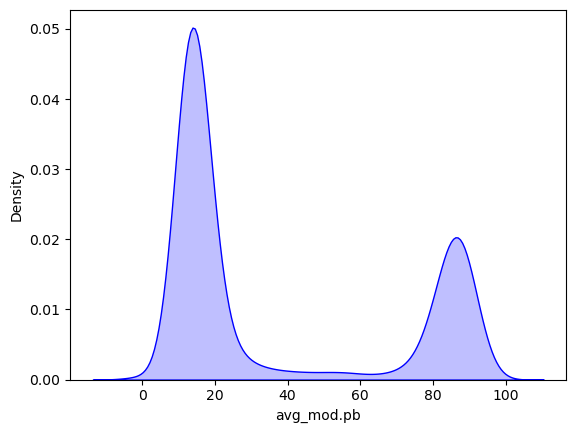

In [16]:
# density of ONT methylation frequencies
sns.kdeplot(combined_cpg['avg_mod.pb'], color='blue', fill=True)
# plt.savefig('density.plot.svg')

In [17]:
def make_hm_array(dframe,ont_freq,pb_freq,pseudocounts = 11):
    
    hm_arr = np.zeros([102,102], dtype=int)
    
    for i in range(dframe.shape[0]):
        row = round(dframe[ont_freq].iloc[i])
        col = round(dframe[pb_freq].iloc[i])
        hm_arr[row,col]+=1
        
    hm_arr = hm_arr + pseudocounts
    
    return hm_arr

In [18]:
# select positions with > 5 reads per strand
plot_data_over5coverage = inner_combined_cpg.loc[
    (inner_combined_cpg['coverage.ont'] > 5) &
    (inner_combined_cpg['coverage.pb'] > 5)]

# test function with first 500 positons
#h = make_hm_array(plot_data_over5coverage,'avg_mod.ont','avg_mod.pb')

In [25]:
plot_data_over10coverage = inner_combined_cpg.loc[
    (inner_combined_cpg['coverage.ont'] > 10) &
    (inner_combined_cpg['coverage.pb'] > 10)]
h = make_hm_array(plot_data_over10coverage,'avg_mod.ont','avg_mod.pb')

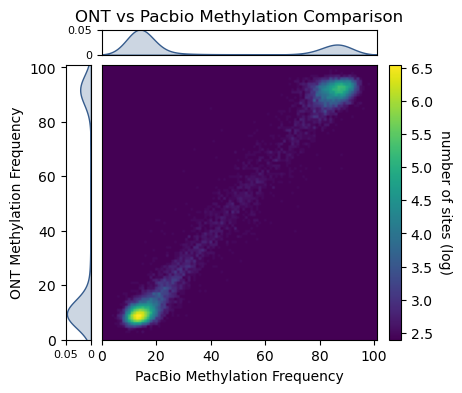

In [26]:
# set the figure size to 5''x2''
figureHeight=6
figureWidth=6
plt.figure(figsize=(figureWidth,figureHeight))

# set the size of the panels
 # Main Panels: 1'' wide and 1'' high.
 # Side Panels: 0.25'' wide and 1'' hight
 # Top Panels: 1'' wide and 0.25'' hight
mainPanelWidth=2.75
mainPanelHeight=2.75
sidePanelWidth=0.25
topPanelHeight=0.25
# set the variables for relative height and width of all 6 panels
relativeMainPanelWidth=mainPanelWidth/figureWidth
relativeMainPanelHeight=mainPanelHeight/figureHeight
relativeSidePanelWidth=sidePanelWidth/figureWidth
relativeTopPanelHeight=topPanelHeight/figureHeight

# left,bottom, width,height
leftPanes = 0.16
rightPanes = 0.57

# set the max and min for x and y axis values, for all the different pannels
xminSide=0.05
xmaxSide=0
xminMain=0
xmaxMain=101
ymin=0
ymax=101
yminTop=0
ymaxTop=0.05

### Side Panel
#                # left,bottom, width,height
panel1= plt.axes([0.1,0.1,relativeSidePanelWidth,relativeMainPanelHeight])
for panel in [panel1]:
    panel.set_xlim(xminSide,xmaxSide)
    panel.set_xticks([0,0.05])
    panel.set_xticklabels(['0','0.05'], fontsize = 8)
    panel.set_xlabel('')
    
### Main Panel
#                # left,bottom, width,height
panel2=plt.axes([leftPanes,0.1,relativeMainPanelWidth,relativeMainPanelHeight])
for panel in [panel2]:
    panel.tick_params(bottom=True, labelbottom=True,
        left=False, labelleft=False,
        right=False, labelright=False,
        top=False, labeltop=False)
    panel.set_xlim(xminMain,xmaxMain)

for panel in [panel1,panel2]:
    panel.set_ylim(0,101)
    
### Top Panel
#                # left,bottom, width,height
panel3=plt.axes([leftPanes,0.575,relativeMainPanelWidth,relativeTopPanelHeight])
for panel in [panel3]:#,panel6]:
    panel.tick_params(bottom=False, labelbottom=False,
        left=True, labelleft=True,
        right=False, labelright=False,
        top=False, labeltop=False)
    panel.set_ylim(yminTop,ymaxTop)
    panel.set_xlim(xminMain,xmaxMain)
    panel.set_yticks([0,0.05])
    panel.set_yticklabels(['0','0.05'], fontsize = 8)
    panel.set_title('ONT vs Pacbio Methylation Comparison')
    
# Heatmap color legend
# panel4=plt.axes([0.75,0.1,0.2/figureWidth,relativeMainPanelHeight])
# #     panel.set_ylim(0,20)
# #     panel.set_xlim(0,1)
# #     panel.set_yticks([0,10,20])
# #     panel.set_yticklabels(['0','10','>20'])
# panel4.tick_params(bottom=False, labelbottom=False,
#         left=True, labelleft=True,
#         right=False, labelright=False,
#         top=False, labeltop=False)

# heatmap
im = panel2.imshow(np.log(h),origin='lower')
# Create an axes for colorbar. The position of the axes is calculated based on the position of ax.
cax = plt.axes([panel2.get_position().x1+0.02,panel2.get_position().y0,0.02,panel2.get_position().height])
cbar = panel2.figure.colorbar(im, cax=cax)
cbar.ax.set_ylabel('number of sites (log)', rotation=-90, va="bottom")

dcolor = (0.212395, 0.359683, 0.55171)
# density plot for bisulfite
sns.kdeplot(plot_data_over10coverage['avg_mod.pb'], color=dcolor, fill=True, ax=panel3)

# density plot for ONT
# flip the plot axis (y='freq.nano')
kdeONT = sns.kdeplot(data = plot_data_over10coverage, y='avg_mod.ont', color=dcolor, fill=True, ax=panel1)

panel3.set_ylabel('')
panel1.set_xlabel('')
panel1.set_ylabel('ONT Methylation Frequency')
panel2.set_xlabel('PacBio Methylation Frequency')

plt.savefig('ont_bis_heatmap_density'+".svg")

In [20]:
UMARY_pb_cpg = pd.read_csv(
    "UMARY4546_pb_cpg.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'idk1':float, 'idk2':float, 'idk3':float, 'idk4':float, 'idk5':float, 'idk6':float, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'idk1', 'idk2', 'idk3', 'idk4', 'idk5', 'idk6', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

UMARY_pb_cpg
#KOLF_pb_cpg_mod = KOLF_pb_cpg.drop(KOLF_pb_cpg.columns[[4,5,6,7,8,9]],axis=1)
#KOLF_pb_cpg_mod

,chrom,start,end,name,idk1,idk2,idk3,idk4,idk5,idk6,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,28735,29737,CpG:_111,1002.0,111.0,731.0,22.2,73.0,0.85,13.251473,7.187907,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,chr1,135124,135563,CpG:_30,439.0,30.0,295.0,13.7,67.2,0.64,84.401371,8.921143,23.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,chr1,199251,200121,CpG:_104,870.0,104.0,643.0,23.9,73.9,0.89,14.347380,8.871898,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,chr1,368792,370063,CpG:_99,1271.0,99.0,777.0,15.6,61.1,0.84,86.056049,5.041068,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,chr1,381172,382185,CpG:_84,1013.0,84.0,734.0,16.6,72.5,0.64,91.821167,3.553260,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27944,chrY,25464370,25464941,CpG:_51,571.0,51.0,403.0,17.9,70.6,0.72,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27945,chrY,26409388,26409785,CpG:_32,397.0,32.0,252.0,16.1,63.5,0.82,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27946,chrY,26627168,26627397,CpG:_25,229.0,25.0,172.0,21.8,75.1,0.78,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27947,chrY,57067645,57068034,CpG:_36,389.0,36.0,257.0,18.5,66.1,0.85,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<AxesSubplot:xlabel='avg_mod', ylabel='Density'>

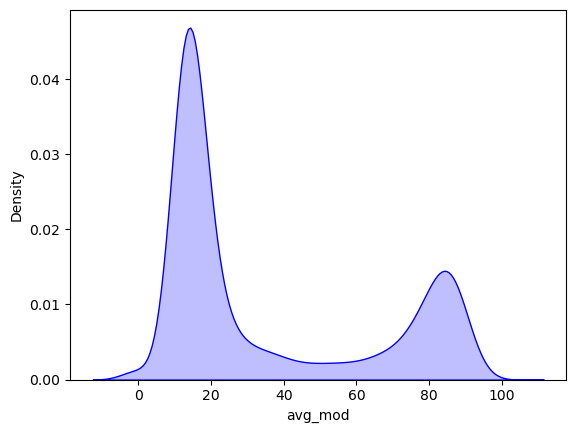

In [21]:
sns.kdeplot(UMARY_pb_cpg['avg_mod'], color='blue', fill=True)

(1.0, 100.0)

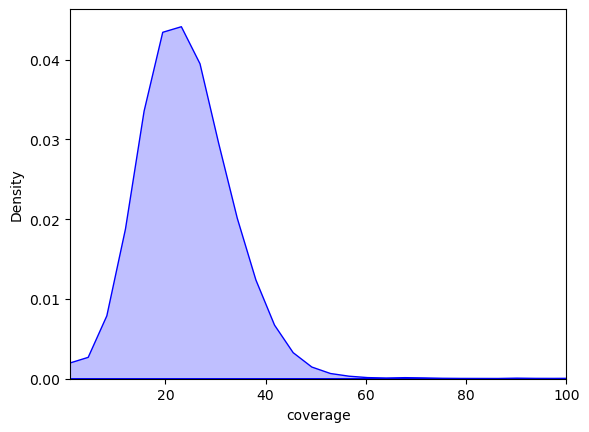

In [22]:
fig, ax = plt.subplots()
sns.kdeplot(UMARY_pb_cpg['coverage'], color='blue', fill=True)
ax.set_xlim(1, 100)

In [23]:
UMARY_pb_hs = pd.read_csv(
    "UMARY4546_pb_hs.bed",
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'name':str, 'score':int, 'strand':str, 'tstart':int, 'tend':int, 'avg_mod':float, 'SD_avg_mod':float, 'coverage':float, 'avg_mod_h1':float, 'SD_avg_mod_h1':float, 'coverage_h1':float, 'avg_mod_h2':float, 'SD_avg_mod_h2':float, 'coverage_h2':float},
    names=['chrom', 'start', 'end', 'name', 'score', 'strand', 'tstart', 'tend', 'avg_mod', 'SD_avg_mod', 'coverage', 'avg_mod_h1', 'SD_avg_mod_h1', 'coverage_h1', 'avg_mod_h2', 'SD_avg_mod_h2', 'coverage_h2']
)

UMARY_pb_hs

,chrom,start,end,name,score,strand,tstart,tend,avg_mod,SD_avg_mod,coverage,avg_mod_h1,SD_avg_mod_h1,coverage_h1,avg_mod_h2,SD_avg_mod_h2,coverage_h2
0,chr1,959245,959305,NOC2L_1,900,-,959245,959256,4.629630,5.819354,18.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,chr1,960583,960643,KLHL17_1,900,+,960632,960643,18.595679,15.632381,18.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492,29.605263,25.716869,19.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,chr1,976670,976730,PERM1_1,900,-,976670,976681,36.755952,21.719728,16.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097,3.968254,8.734667,21.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,chrX,155612941,155613001,TMLHE_1,900,-,155612941,155612952,14.838710,22.124423,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29594,chrX,155767702,155767762,SPRY3_2,900,+,155767751,155767762,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29595,chrX,155881295,155881355,VAMP7_1,900,+,155881344,155881355,27.083333,30.290836,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29596,chrY,18992808,18992868,CD24_1,900,-,18992808,18992819,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
